In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import statsmodels.api as stm
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import folium
import matplotlib
import os
os.environ["PROJ_LIB"] = "C:\\Users\\singh\\anaconda3\\Library\\share";
from mpl_toolkits.basemap import Basemap
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [67]:
data = pd.read_csv(r'D:\study\gourabsir\assignment\wk3_kc_house_train_data.csv')
val_data = pd.read_csv(r'D:\study\gourabsir\assignment\wk3_kc_house_valid_data.csv')

In [1]:
#theme control
import jupyterthemes as jt
#for night
!jt -t gruvboxd -T -N
#for reset
!jt -r

Reset css and font defaults in:
C:\Users\singh\.jupyter\custom &
C:\Users\singh\AppData\Roaming\jupyter\nbextensions


In [68]:
print(data.corr())

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.006011 -0.002571   0.005821    -0.007559 -0.130303   
price         -0.006011  1.000000  0.300777   0.527512     0.705044  0.094146   
bedrooms      -0.002571  0.300777  1.000000   0.506070     0.560989  0.028895   
bathrooms      0.005821  0.527512  0.506070   1.000000     0.758930  0.079435   
sqft_living   -0.007559  0.705044  0.560989   0.758930     1.000000  0.162786   
sqft_lot      -0.130303  0.094146  0.028895   0.079435     0.162786  1.000000   
floors         0.007793  0.262955  0.181042   0.501899     0.366219 -0.003543   
waterfront     0.000834  0.274953 -0.006803   0.061483     0.097203  0.029420   
view           0.023355  0.399711  0.079863   0.182988     0.285735  0.099221   
condition     -0.015321  0.044754  0.036135  -0.115382    -0.047938 -0.008722   
grade          0.012491  0.665594  0.342305   0.660925     0.764819  0.115611   
sqft_above    -0.006447  0.6

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

In [70]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.428336e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.797779e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [71]:
# drop any column
data.drop(['sqft_living15','sqft_lot15'],axis=1,inplace=True)

In [72]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045


In [73]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.428336e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322
std,2.876044e+09,3.797779e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000


In [74]:
data.price.describe()

count    9.761000e+03
mean     5.428336e+05
std      3.797779e+05
min      8.000000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.490000e+05
max      7.700000e+06
Name: price, dtype: float64

Text(0.5, 1.0, 'Histogram for Price')

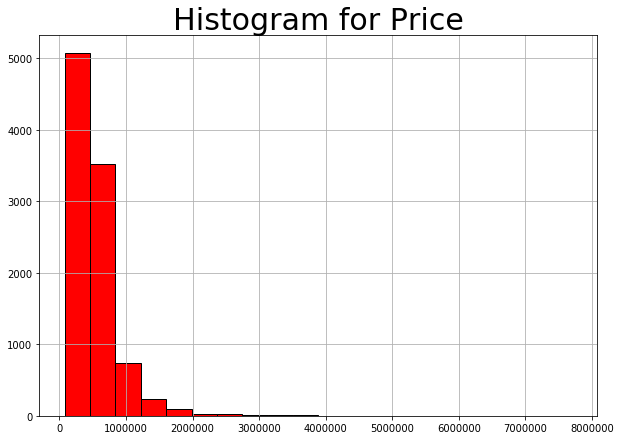

In [75]:
data.hist(column="price",
         grid = True,
         figsize =(10,7),
         color = "red",
         edgecolor = "black",
         bins = 20)
plt.title('Histogram for Price',fontsize=30)


Text(0.5, 1.0, 'Checking for outliers')

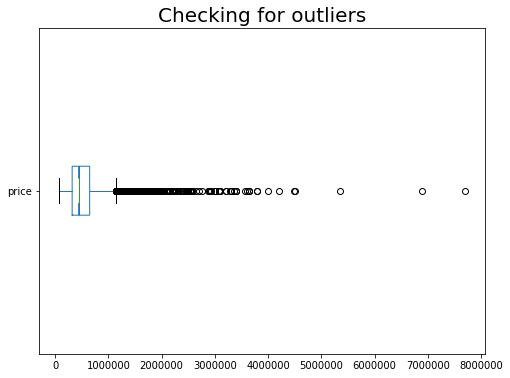

In [76]:
data.boxplot(column="price",
            grid = False,
            figsize = (8,6),
            vert = False,
            notch = True)
plt.title('Checking for outliers',fontsize=20)

In [77]:
data['log_price'] = np.log(data['price'])

Text(0.5, 1.0, 'Histogram for Log of Price')

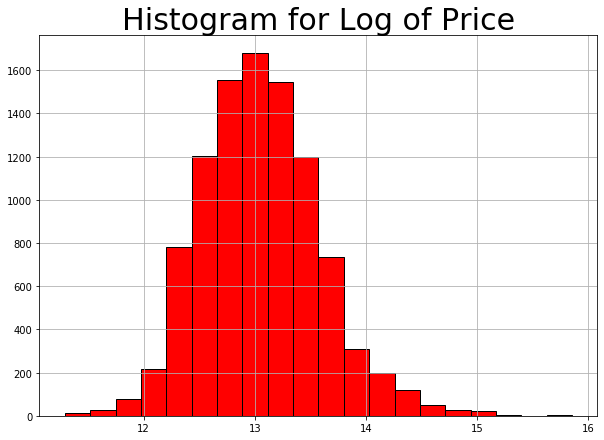

In [78]:
data.hist(column="log_price",
         grid = True,
         figsize =(10,7),
         color = "red",
         edgecolor = "black",
         bins = 20)
plt.title('Histogram for Log of Price',fontsize=30)

Text(0.5, 1.0, 'Outliers on transformed Data')

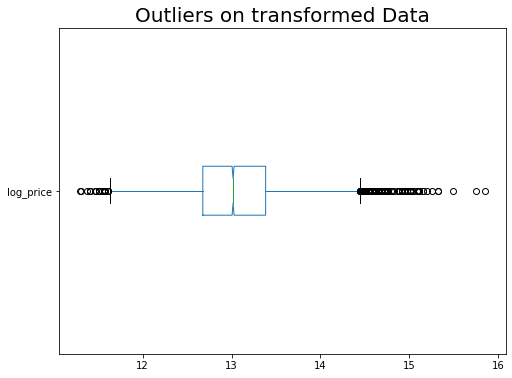

In [79]:
data.boxplot(column="log_price",
            grid = False,
            figsize = (8,6),
            vert = False,
            notch = True)
plt.title('Outliers on transformed Data',fontsize=20)

In [80]:
#Upper and Lower benchmarks for outliers

iqr = data.price.quantile(0.75) - data.price.quantile(0.25)
ub = data.price.quantile(0.75) + 1.5*iqr      # Q1 - 1.5*IQR
lb = data.price.quantile(0.25) - 1.5*iqr      # Q3 + 1.5*IQR

print(iqr,lb, ub)

329000.0 -173500.0 1142500.0


In [81]:
sum(data.price > ub)


522

In [82]:
sum(data.price < lb)

0

In [83]:
#Upper and Lower benchmarks for outliers of transformed data

iqr = data.log_price.quantile(0.75) - data.log_price.quantile(0.25)
ub = data.log_price.quantile(0.75) + 1.5*iqr      # Q1 - 1.5*IQR
lb = data.log_price.quantile(0.25) - 1.5*iqr      # Q3 + 1.5*IQR

print(iqr,lb, ub)

0.7071117209103175 11.615408693410433 14.443855577051703


In [84]:
sum(data.log_price > ub)

127

In [85]:
sum(data.log_price < lb)

21

In [86]:
127+21

148

In [87]:
# bivariate analysis
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,log_price
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,13.311329
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,14.022525
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,13.056224
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,12.644328
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,12.899220


In [88]:
tab = pd.crosstab(data.bedrooms, columns="counts")
tab

col_0,counts
bedrooms,
0,6
1,88
2,1255
3,4417
4,3094
5,755
6,116
7,17
8,7


Text(0.5, 1.0, 'number of houses as per bedrooms')

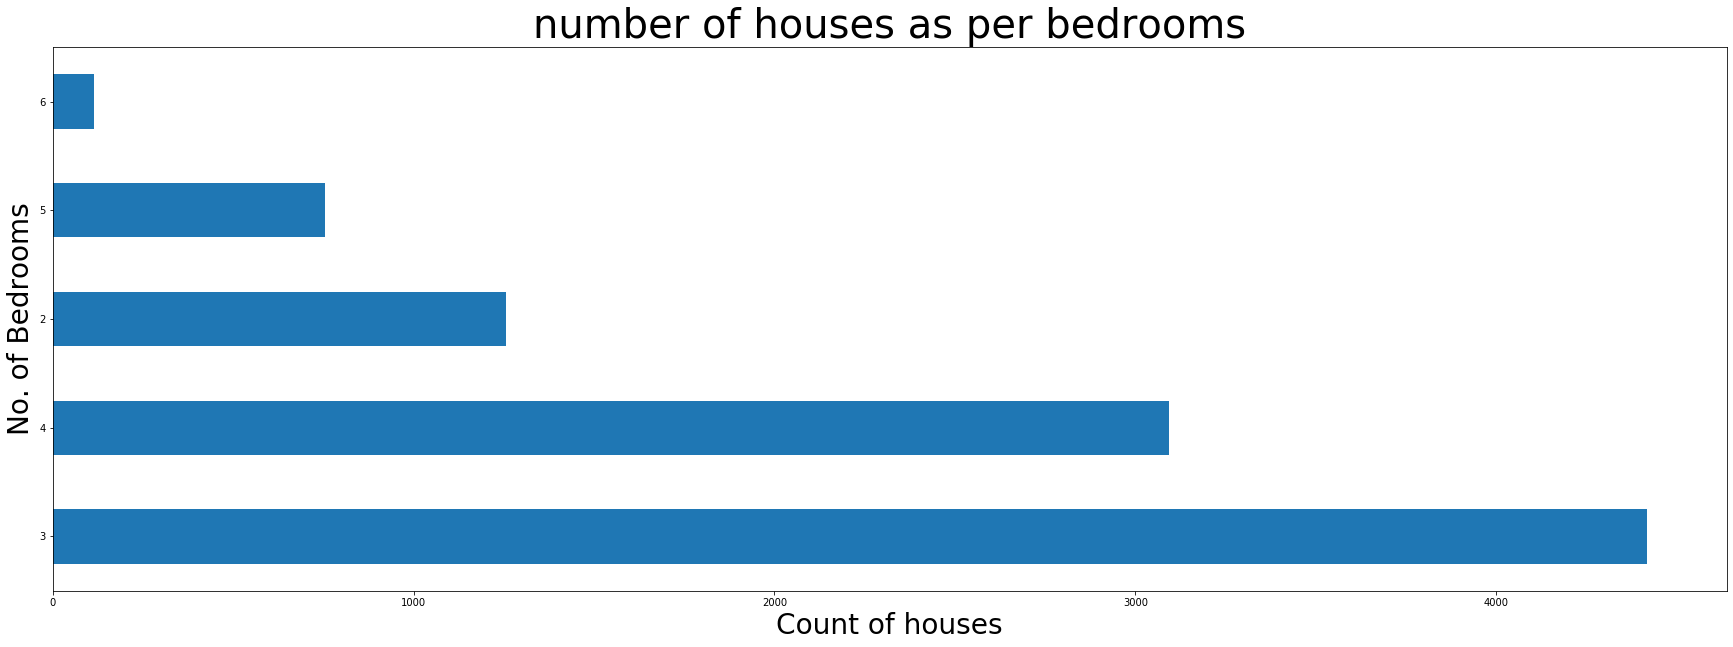

In [89]:
data['bedrooms'].value_counts().head(5).plot(kind='barh',figsize=(30,10))
plt.xlabel("Count of houses", fontsize=28)
plt.ylabel("No. of Bedrooms", fontsize=28)
plt.title("number of houses as per bedrooms", fontsize=40)

Text(0.5, 1.0, 'Distribution of Price With Bedrooms')

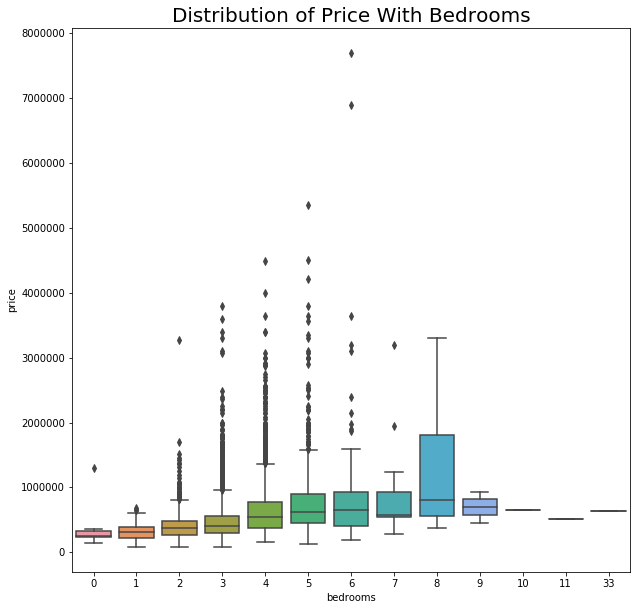

In [90]:
plt.figure(figsize=(10,10))
sns.boxplot( x=data["bedrooms"], y=data["price"])
plt.title('Distribution of Price With Bedrooms',fontsize=20)

In [91]:
pearsonr(data.price, data.bedrooms)[0]

0.30077732501568166

In [92]:
data[["price","bedrooms"]].groupby(["bedrooms"]).mean()

,price
bedrooms,
0,4.208333e+05
1,3.174748e+05
2,4.030045e+05
3,4.651113e+05
4,6.400094e+05
5,7.866218e+05
6,9.107516e+05
7,8.887153e+05
8,1.318714e+06


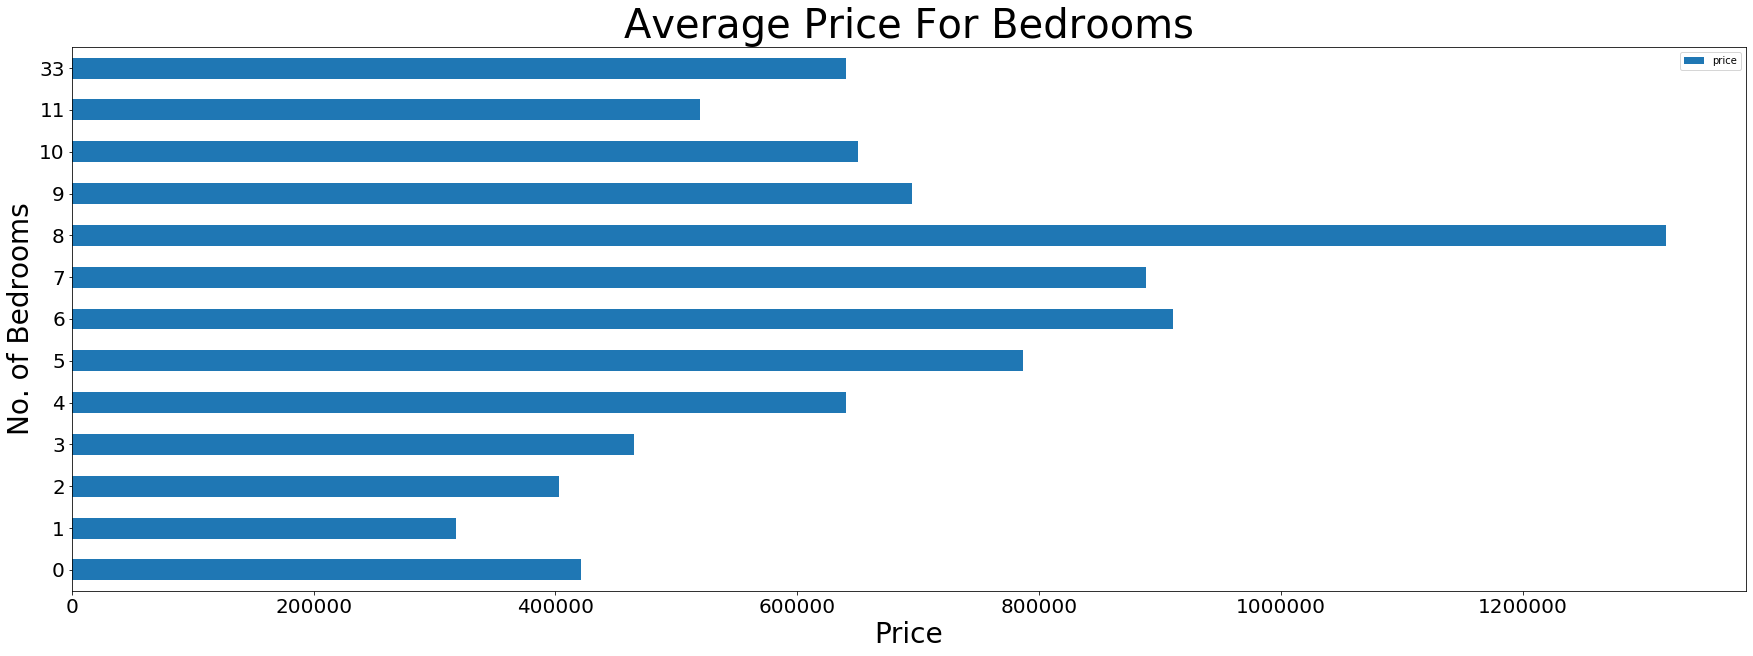

In [93]:
data[["price","bedrooms"]].groupby(["bedrooms"]).mean().plot(kind='barh',figsize=(30,10))
plt.xlabel("Price", fontsize=28)
plt.ylabel("No. of Bedrooms", fontsize=28)
plt.title("Average Price For Bedrooms", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=20)

In [94]:
#till 8 bedrooms average price is increasing with increase in bedrooms

In [95]:
data.loc[(data.bedrooms == 6)].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,log_price
count,1.160000e+02,1.160000e+02,116.0,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,4.434939e+09,9.107516e+05,6.0,3.245690,3366.120690,19297.172414,1.612069,0.017241,0.646552,3.431034,8.077586,2575.189655,790.931034,1964.215517,241.370690,98083.948276,47.588002,-122.253534,13.439692
std,2.803374e+09,1.036395e+06,0.0,1.181829,1519.571365,39021.747146,0.578928,0.130734,1.307200,0.635530,1.544420,1353.865705,655.418641,29.153807,654.345269,59.292619,0.123118,0.103400,0.665026
min,1.250591e+08,1.949900e+05,6.0,1.000000,1430.000000,2370.000000,1.000000,0.000000,0.000000,2.000000,5.000000,900.000000,0.000000,1900.000000,0.000000,98002.000000,47.277300,-122.408000,12.180704
25%,2.100725e+09,4.075000e+05,6.0,2.500000,2517.500000,6390.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1595.000000,0.000000,1949.500000,0.000000,98030.750000,47.528100,-122.328000,12.917739
50%,3.929901e+09,6.525000e+05,6.0,3.000000,2970.000000,9114.500000,2.000000,0.000000,0.000000,3.000000,8.000000,2345.000000,845.000000,1966.000000,0.000000,98103.000000,47.613850,-122.280000,13.388559
75%,6.942340e+09,9.363875e+05,6.0,4.000000,3625.000000,14937.250000,2.000000,0.000000,0.000000,4.000000,9.000000,3171.500000,1225.000000,1984.250000,0.000000,98119.750000,47.676500,-122.189500,13.749597
max,9.551202e+09,7.700000e+06,6.0,8.000000,12050.000000,230652.000000,3.000000,1.000000,4.000000,5.000000,13.000000,8860.000000,3480.000000,2013.000000,2015.000000,98199.000000,47.772200,-121.869000,15.856731


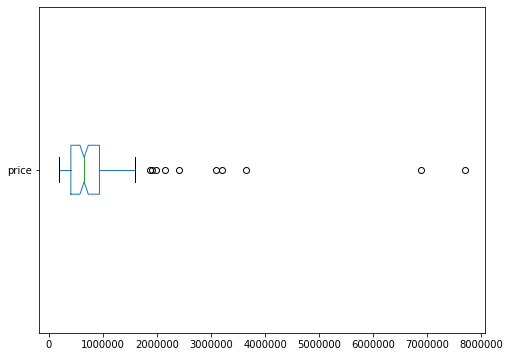

In [96]:
data.loc[(data.bedrooms == 6)].boxplot(column="price",
            grid = False,
            figsize = (8,6),
            vert = False,
            notch = True)

In [97]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,log_price
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,13.311329
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,14.022525
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,13.056224
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,12.644328
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,12.899220


In [98]:
tab = pd.crosstab(data.bathrooms, columns="counts")
tab

col_0,counts
bathrooms,
0.00,4
0.75,37
1.00,1741
1.25,5
1.50,599
1.75,1431
2.00,871
2.25,937
2.50,2409


In [99]:
pearsonr(data.price, data.bathrooms)[0]

0.5275117130183168

In [100]:
data[["price","bathrooms"]].groupby(["bathrooms"]).mean()

,price
bathrooms,
0.00,5.080000e+05
0.75,3.071554e+05
1.00,3.444751e+05
1.25,5.848900e+05
1.50,4.120863e+05
1.75,4.579037e+05
2.00,4.442849e+05
2.25,5.323622e+05
2.50,5.642074e+05


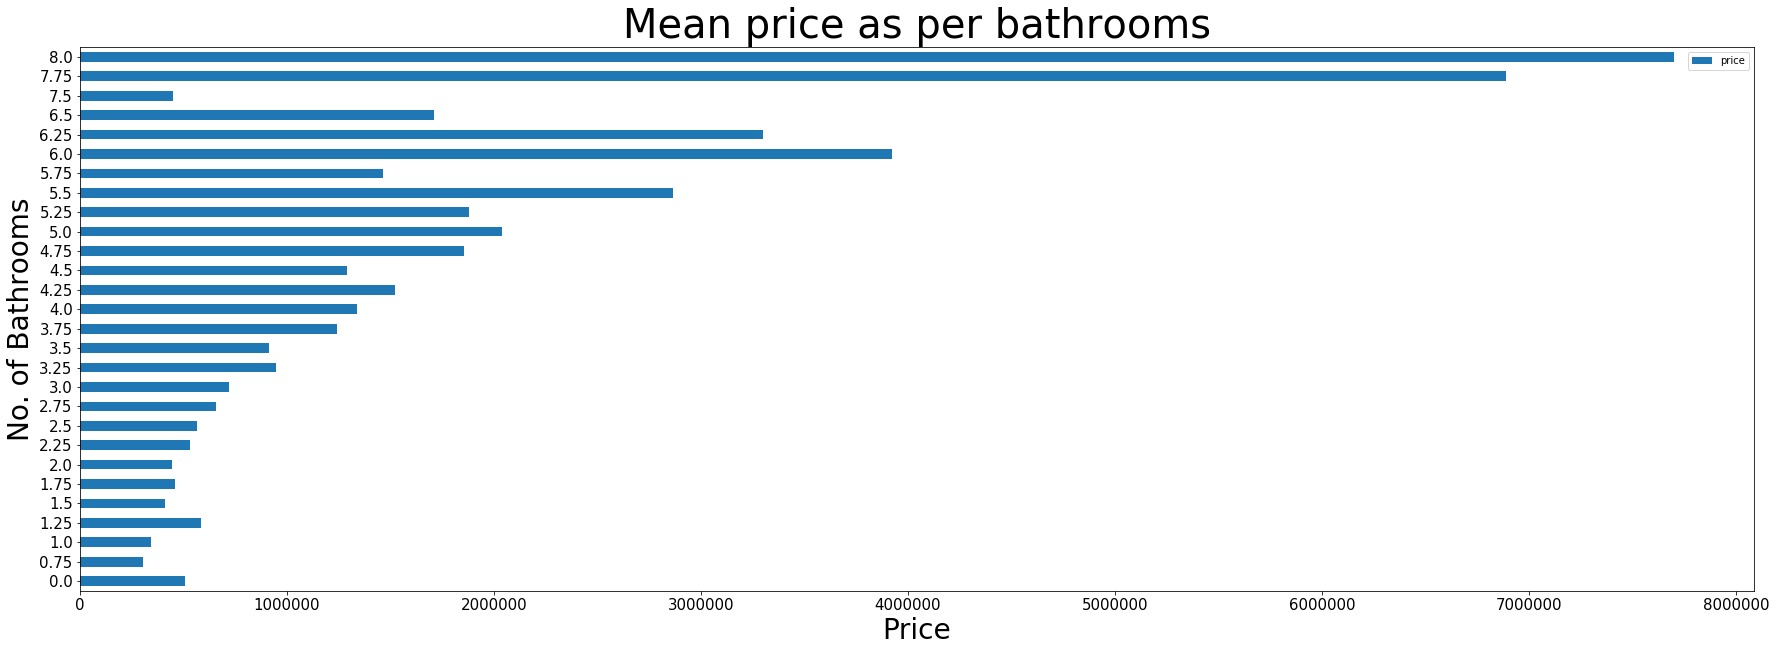

In [101]:
data[["price","bathrooms"]].groupby(["bathrooms"]).mean().plot(kind='barh',figsize=(30,10))
plt.xlabel("Price", fontsize=28)
plt.ylabel("No. of Bathrooms", fontsize=28)
plt.title("Mean price as per bathrooms", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=15)

Text(0.5, 1.0, 'Distribution of Price With Bathrooms')

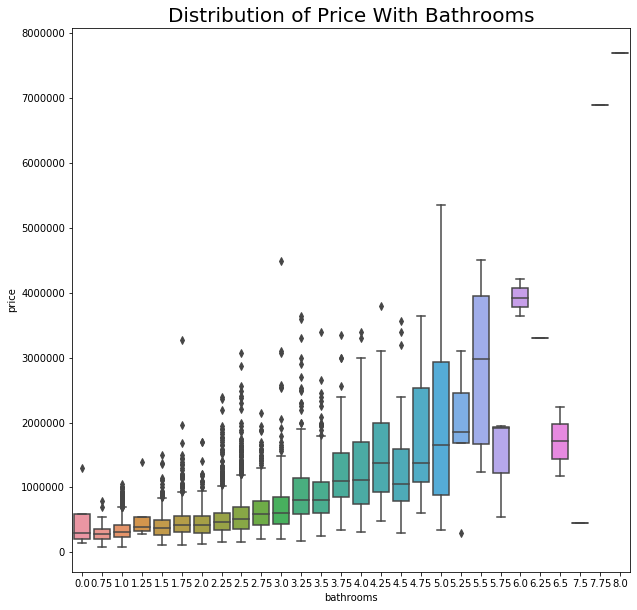

In [102]:
plt.figure(figsize=(10,10))
sns.boxplot( x=data["bathrooms"], y=data["price"])
plt.title('Distribution of Price With Bathrooms',fontsize=20)

Text(0.5, 1.0, 'Histogram for sqft_living')

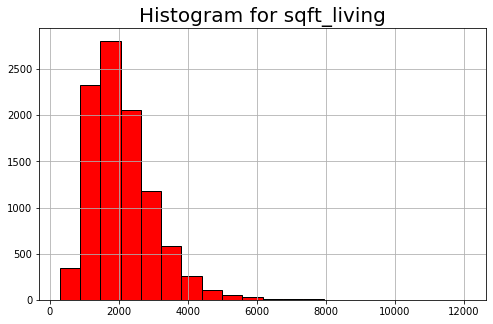

In [103]:
data.hist(column="sqft_living",
         grid = True,
         figsize =(8,5),
         color = "red",
         edgecolor = "black",
         bins = 20)
plt.title('Histogram for sqft_living',fontsize=20)

In [104]:
data.hist(column="log_sqft_living",
         grid = True,
         figsize =(8,5),
         color = "red",
         edgecolor = "black",
         bins = 20)
plt.title('Histogram for transformed sqft_living',fontsize=20)

KeyError: "None of [Index(['log_sqft_living'], dtype='object')] are in the [columns]"

Text(0.5, 1.0, 'Box Plot of sqft_living')

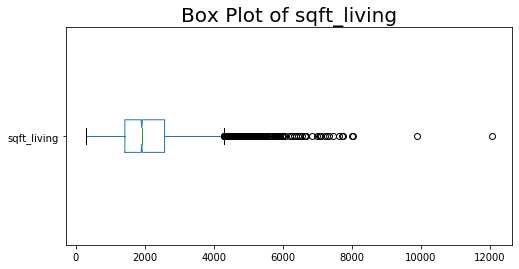

In [105]:
data.boxplot(column="sqft_living",
            grid = False,
            figsize = (8,4),
            vert = False,
            notch = True)
plt.title('Box Plot of sqft_living',fontsize=20)

KeyError: "None of [Index(['log_sqft_living'], dtype='object')] are in the [columns]"

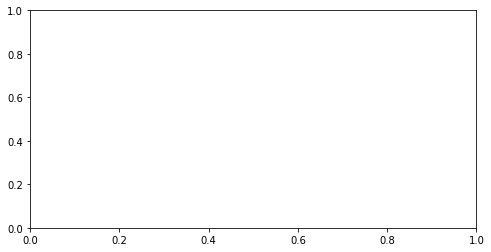

In [106]:
data.boxplot(column="log_sqft_living",
            grid = False,
            figsize = (8,4),
            vert = False,
            notch = True)
plt.title('Box Plot of transformed sqft_living',fontsize=20)

In [107]:
pearsonr(data.price, data.sqft_living)[0]

0.7050436600678027

In [108]:
data[["price","sqft_living"]].describe()

,price,sqft_living
count,9.761000e+03,9761.000000
mean,5.428336e+05,2086.734146
std,3.797779e+05,927.194303
min,8.000000e+04,290.000000
25%,3.200000e+05,1420.000000
50%,4.500000e+05,1910.000000
75%,6.490000e+05,2570.000000
max,7.700000e+06,12050.000000


Text(0.5, 1.0, 'Relation Between Price and sqft_living')

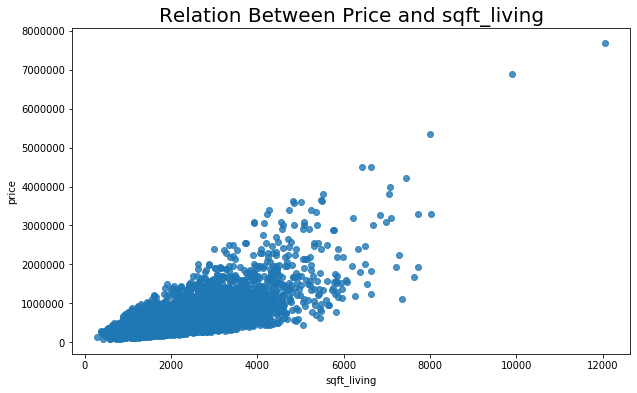

In [109]:
plt.figure(figsize=(10,6))
sns.regplot(x=data["sqft_living"], y=data["price"],fit_reg=False)
plt.title('Relation Between Price and sqft_living',fontsize=20)

In [ ]:
data.boxplot(column="sqft_living",
            grid = False,
            figsize = (8,6),
            vert = False,
            notch = True)

In [ ]:
#Upper and Lower benchmarks for outliers

iqr = data.sqft_living.quantile(0.75) - data.sqft_living.quantile(0.25)
ub = data.sqft_living.quantile(0.75) + 1.5*iqr      # Q1 - 1.5*IQR
lb = data.sqft_living.quantile(0.25) - 1.5*iqr      # Q3 + 1.5*IQR

print(iqr,lb, ub)

In [ ]:
sum(data.sqft_living > ub)


In [ ]:
sum(data.sqft_living < lb)

In [ ]:
#Upper and Lower benchmarks for outliers

iqr = data.log_sqft_living.quantile(0.75) - data.log_sqft_living.quantile(0.25)
ub = data.log_sqft_living.quantile(0.75) + 1.5*iqr      # Q1 - 1.5*IQR
lb = data.log_sqft_living.quantile(0.25) - 1.5*iqr      # Q3 + 1.5*IQR

print(iqr,lb, ub)

In [ ]:
sum(data.log_sqft_living > ub)


In [ ]:
sum(data.log_sqft_living < lb)

In [ ]:
pearsonr(data.price, data.sqft_lot)[0]

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x=data["sqft_lot"], y=data["price"],fit_reg=False)
plt.title('Relation Between Price and sqft_lot',fontsize=20)

In [ ]:
data[["price","floors"]].groupby(["floors"]).mean()

In [ ]:
data[["price","floors"]].groupby(["floors"]).mean().plot(kind='barh',figsize=(30,5))
plt.xlabel("Price", fontsize=28)
plt.ylabel("Floors", fontsize=28)
plt.title("Mean price as per floors", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=20)

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot( x=data["floors"], y=data["price"])
plt.xlabel("Floors", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Box Plot of price as per floors", fontsize=20)

In [ ]:
pearsonr(data.price, data.floors)[0]

In [ ]:
tab = pd.crosstab(data.floors, columns="counts")
tab

In [ ]:
data.head(1)

In [ ]:
data[["price","waterfront"]].groupby(["waterfront"]).mean()

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot( x=data["waterfront"], y=data["price"])
plt.xlabel("Waterfront", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Box Plot of price as per Waterfront", fontsize=20)

In [ ]:
tab = pd.crosstab(data.waterfront, columns="counts")
tab

In [ ]:
data[data.waterfront>0]

In [ ]:
data[data.waterfront==0].boxplot(column="price",
            grid = False,
            figsize = (8,6),
            vert = False,
            notch = True)

In [ ]:
data[data.waterfront==1].boxplot(column="price",
            grid = False,
            figsize = (8,6),
            vert = False,
            notch = True)

In [ ]:
table = pd.crosstab(data.waterfront, columns=data.grade)
#table.columns = ["Cyl3","Cyl4","Cyl5","Cyl6","Cyl8"]
#table.index = ["EU","JP","US"]
table

In [ ]:
#mostly the water front are in higher grade

In [ ]:
tab = pd.crosstab(data.view, columns="counts")
tab

In [ ]:
pearsonr(data.price, data.view)[0]

In [ ]:
data[["price","view"]].groupby(["view"]).mean()

In [ ]:
data[["price","view"]].groupby(["view"]).mean().plot(kind='barh',figsize=(30,8),edgecolor='black')
plt.xlabel("Price", fontsize=28)
plt.ylabel("View", fontsize=28)
plt.title("Mean price as per view", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=20)

In [ ]:
tab = pd.crosstab(data.condition, columns="counts")
tab

In [ ]:
data[["price","condition"]].groupby(["condition"]).mean()

In [ ]:
pearsonr(data.price, data.condition)[0]

In [ ]:
#for condition we will check with trial and error as we cannot see any relation from the corr directly. We can do one
#hot encoding and check if it is helping in improving the performance of the model

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot( x=data["condition"], y=data["price"])
plt.xlabel("Condition", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Box Plot of price as per Condition", fontsize=20)

In [ ]:
# Delete this as i was trying to check the relation between grade and view
table = pd.crosstab(data.view, columns=data.grade).apply(lambda r: r/r.sum()*100, axis=1)
table

In [ ]:
tab = pd.crosstab(data.grade, columns="counts")
tab

In [ ]:
pearsonr(data.price, data.grade)[0]

In [ ]:
data[["price","grade"]].groupby(["grade"]).mean().plot(kind='barh',figsize=(30,10),edgecolor='black')
plt.xlabel("Price", fontsize=28)
plt.ylabel("Grade", fontsize=28)
plt.title("Mean price as per grade", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=20)

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x=data["sqft_above"], y=data["price"],fit_reg=False)
plt.title('Relation Between Price and sqft_above',fontsize=20)

In [ ]:
pearsonr(data.price, data.sqft_above)[0]

In [ ]:
pearsonr(data.price, data.sqft_basement)[0]

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x=data["sqft_basement"], y=data["price"],fit_reg=False)
plt.title('Relation Between Price and sqft_basement',fontsize=20)

# year built

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(data[["price","yr_built"]].groupby(["yr_built"]).mean())
plt.xlabel("Year Built", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Variation of price as per Year built", fontsize=20)
plt.show()

In [ ]:
# creating column 
data["m_year"] = np.where(data.yr_renovated !=0, data.yr_renovated, data.yr_built)

In [ ]:
plt.plot(data[["price","m_year"]].groupby(["m_year"]).mean())
plt.xlabel("Custom Year", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Variation of price as per custom Year", fontsize=20)
plt.show()
plt.show()

In [ ]:
plt.plot(data[["price","m_year"]].groupby(["m_year"]).mean())
plt.show()

In [7]:
data['year_renovated']=np.where(data.yr_renovated !=0, 1, 0)

In [ ]:
tab = pd.crosstab(data.year_renovated, columns="counts")
tab

In [ ]:
data[["price","year_renovated"]].groupby(["year_renovated"]).mean()

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot( x=data["year_renovated"], y=data["price"])
plt.xlabel("year_renovated", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Box Plot of price as per year_renovated", fontsize=20)

# For Lat and long

In [ ]:
map_data = pd.DataFrame()
map_data['lat']=data.groupby(['lat','long']).size().reset_index().rename(columns={0:'count'}).lat
map_data['long']=data.groupby(['lat','long']).size().reset_index().rename(columns={0:'count'}).long
map_data['av_price']=data[["price","lat","long"]].groupby(["lat","long"]).mean().values

In [ ]:
lat=map_data['lat'].values
lon=map_data['long'].values
population = map_data['av_price'].values

In [ ]:
#use for map only
%matplotlib notebook
import mpld3
mpld3.enable_notebook()

In [ ]:
#47.128597, -122.864008
fig = plt.figure(figsize=(10,8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=47.5208, lon_0=-122.393,
            width=1.05E6, height=1.2E6,llcrnrlon=-122.864008,llcrnrlat=47.128597,urcrnrlon=-121.803193,urcrnrlat=47.982500)
m.shadedrelief()
# scatter city data, with c reflecting population
m.scatter(lon,lat, latlon=True,
          c=population,s=.7,
          cmap='YlGnBu_r', alpha=0.5)
#create colorbar 
plt.colorbar(label=r'Price')
plt.clim(300000, 4000000)
matplotlib.use('nbagg')

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot( x=data["zipcode"], y=data["price"])
plt.xlabel("", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Box Plot of price as per Zipcode", fontsize=20)

 # Model Building

In [28]:
# Taking Out the train and Validation data
X_train = data[['sqft_living']]
Y_train = data[['price']]
X_val = val_data[['sqft_living']]
Y_val = val_data[['price']]
X_train = stm.add_constant(X_train)
X_val = stm.add_constant(X_val)
regr = LinearRegression()

#Fitting the Model and Prediction
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_val)

In [29]:
print('RMSE =',np.sqrt(np.mean((np.array(Y_val)-y_pred)**2))) #RMSE
R2=r2_score(Y_val, y_pred)
print('R square =',R2)
p = len(X_val.columns) - 1
n = len(X_val)
print('Adjusted R Square =',1-(1-R2)*(n-1)/(n-p-1))

RMSE = 255535.7613537541
R square = 0.4852584581228363
Adjusted R Square = 0.4852050228958169


In [34]:
X_train = data[['sqft_living','bedrooms']]
Y_train = data[['price']]
X_val = val_data[['sqft_living','bedrooms']]
Y_val = val_data[['price']]
regr = LinearRegression() 
X_train = stm.add_constant(X_train)
X_val = stm.add_constant(X_val)
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_val)

In [35]:
print('RMSE =',np.sqrt(np.mean((np.array(Y_val)-y_pred)**2))) #RMSE
R2=r2_score(Y_val, y_pred)
print('R square =',R2)
p = len(X_val.columns) - 1
n = len(X_val)
print('Adjusted R Square =',1-(1-R2)*(n-1)/(n-p-1))

RMSE = 251659.2738256113
R square = 0.500757299387361
Adjusted R Square = 0.5006536360359048


In [36]:
X_train = data[['sqft_living','bedrooms','bathrooms']]
Y_train = data[['price']]
X_val = val_data[['sqft_living','bedrooms','bathrooms']]
Y_val = val_data[['price']]
regr = LinearRegression() 
X_train = stm.add_constant(X_train)
X_val = stm.add_constant(X_val)
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_val)

In [37]:
print('RMSE =',np.sqrt(np.mean((np.array(Y_val)-y_pred)**2))) #RMSE
R2=r2_score(Y_val, y_pred)
print('R square =',R2)
p = len(X_val.columns) - 1
n = len(X_val)
print('Adjusted R Square =',1-(1-R2)*(n-1)/(n-p-1))
#No Significant change is observed

RMSE = 251614.5623414432
R square = 0.5009346812802442
Adjusted R Square = 0.5007792253612162


In [38]:
X_train = data[['sqft_living','bedrooms','sqft_lot']]
Y_train = data[['price']]
X_val = val_data[['sqft_living','bedrooms','sqft_lot']]
Y_val = val_data[['price']]
regr = LinearRegression() 
X_train = stm.add_constant(X_train)
X_val = stm.add_constant(X_val)
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_val)

In [39]:
print('RMSE =',np.sqrt(np.mean((np.array(Y_val)-y_pred)**2))) #RMSE
R2=r2_score(Y_val, y_pred)
print('R square =',R2)
p = len(X_val.columns) - 1
n = len(X_val)
print('Adjusted R Square =',1-(1-R2)*(n-1)/(n-p-1))
#No Significant change is observed

RMSE = 251032.9737375383
R square = 0.5032391206789059
Adjusted R Square = 0.5030843825792315


In [40]:
X_train = data[['sqft_living','bedrooms','floors']]
Y_train = data[['price']]
X_val = val_data[['sqft_living','bedrooms','floors']]
Y_val = val_data[['price']]
regr = LinearRegression() 
X_train = stm.add_constant(X_train)
X_val = stm.add_constant(X_val)
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_val)

In [41]:
print('RMSE =',np.sqrt(np.mean((np.array(Y_val)-y_pred)**2))) #RMSE
R2=r2_score(Y_val, y_pred)
print('R square =',R2)
p = len(X_val.columns) - 1
n = len(X_val)
print('Adjusted R Square =',1-(1-R2)*(n-1)/(n-p-1))
#No Significant change is observed

RMSE = 251653.59693509823
R square = 0.5007798228107312
Adjusted R Square = 0.5006243186541983


In [42]:
X_train = data[['sqft_living','bedrooms','view']]
Y_train = data[['price']]
X_val = val_data[['sqft_living','bedrooms','view']]
Y_val = val_data[['price']]
regr = LinearRegression() 
X_train = stm.add_constant(X_train)
X_val = stm.add_constant(X_val)
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_val)

In [43]:
print('RMSE =',np.sqrt(np.mean((np.array(Y_val)-y_pred)**2))) #RMSE
R2=r2_score(Y_val, y_pred)
print('R square =',R2)
p = len(X_val.columns) - 1
n = len(X_val)
print('Adjusted R Square =',1-(1-R2)*(n-1)/(n-p-1))

RMSE = 241211.10779819897
R square = 0.5413509987865953
Adjusted R Square = 0.5412081323133693


In [44]:
X_train = data[['sqft_living','bedrooms','view','grade']]
Y_train = data[['price']]
X_val = val_data[['sqft_living','bedrooms','view','grade']]
Y_val = val_data[['price']]
regr = LinearRegression() 
X_train = stm.add_constant(X_train)
X_val = stm.add_constant(X_val)
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_val)

In [45]:
print('RMSE =',np.sqrt(np.mean((np.array(Y_val)-y_pred)**2))) #RMSE
R2=r2_score(Y_val, y_pred)
print('R square =',R2)
p = len(X_val.columns) - 1
n = len(X_val)
print('Adjusted R Square =',1-(1-R2)*(n-1)/(n-p-1))

RMSE = 231237.78787588442
R square = 0.5784942943592426
Adjusted R Square = 0.5783192141076784


In [46]:
X_train = data[['sqft_living','bedrooms','view','grade','sqft_above']]
Y_train = data[['price']]
X_val = val_data[['sqft_living','bedrooms','view','grade','sqft_above']]
Y_val = val_data[['price']]
regr = LinearRegression() 
X_train = stm.add_constant(X_train)
X_val = stm.add_constant(X_val)
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_val)
#will again check in the end

In [47]:
print('RMSE =',np.sqrt(np.mean((np.array(Y_val)-y_pred)**2))) #RMSE
R2=r2_score(Y_val, y_pred)
print('R square =',R2)
p = len(X_val.columns) - 1
n = len(X_val)
print('Adjusted R Square =',1-(1-R2)*(n-1)/(n-p-1))

RMSE = 230426.0922708907
R square = 0.5814482565851572
Adjusted R Square = 0.581230917430824


In [22]:
X_train = data[['sqft_living','bedrooms','view','grade','sqft_above','sqft_basement']]
Y_train = data[['price']]
X_val = val_data[['sqft_living','bedrooms','view','grade','sqft_above','sqft_basement']]
Y_val = val_data[['price']]
regr = LinearRegression() 
X_train = stm.add_constant(X_train)
X_val = stm.add_constant(X_val)
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_val)

In [23]:
print('RMSE =',np.sqrt(np.mean((np.array(Y_val)-y_pred)**2))) #RMSE
R2=r2_score(Y_val, y_pred)
print('R square =',R2)
p = len(X_val.columns) - 1
n = len(X_val)
print('Adjusted R Square =',1-(1-R2)*(n-1)/(n-p-1))
#No Significant change is observed

RMSE = 230426.09227089112
R square = 0.5814482565851556
Adjusted R Square = 0.5811874225115694


In [28]:
X_train = data[['sqft_living','bedrooms','view','grade','sqft_above','yr_built']]
Y_train = data[['price']]
X_val = val_data[['sqft_living','bedrooms','view','grade','sqft_above','yr_built']]
Y_val = val_data[['price']]
regr = LinearRegression() 
X_train = stm.add_constant(X_train)
X_val = stm.add_constant(X_val)
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_val)

In [29]:
print('RMSE =',np.sqrt(np.mean((np.array(Y_val)-y_pred)**2))) #RMSE
R2=r2_score(Y_val, y_pred)
print('R square =',R2)
p = len(X_val.columns) - 1
n = len(X_val)
print('Adjusted R Square =',1-(1-R2)*(n-1)/(n-p-1))

RMSE = 216522.24373957454
R square = 0.6304349581847275
Adjusted R Square = 0.6302046517606632


### creating dummies for train data

In [30]:
waterfront_dummy=pd.get_dummies(data['waterfront'], prefix='waterfront',drop_first=True)
zipcode_dummy=pd.get_dummies(data['zipcode'], prefix='zipcode',drop_first=True)
condition_dummy = pd.get_dummies(data['condition'], prefix='condition',drop_first=True)
year_renovated_dummy = pd.get_dummies(data['year_renovated'], prefix='year_renovated',drop_first=True)

frames = [data,waterfront_dummy, zipcode_dummy, condition_dummy,year_renovated_dummy]
data_dummy = pd.concat(frames, axis = 1)

### creating dummies for  validation data

In [31]:
#adding year_renovated to validation data
val_data['year_renovated']=np.where(val_data.yr_renovated !=0, 1, 0)

val_waterfront_dummy=pd.get_dummies(val_data['waterfront'], prefix='waterfront',drop_first=True)
val_zipcode_dummy=pd.get_dummies(val_data['zipcode'], prefix='zipcode',drop_first=True)
val_condition_dummy = pd.get_dummies(val_data['condition'], prefix='condition',drop_first=True)
val_year_renovated_dummy = pd.get_dummies(val_data['year_renovated'], prefix='year_renovated',drop_first=True)
frames = [val_data,val_waterfront_dummy, val_zipcode_dummy, val_condition_dummy,val_year_renovated_dummy]
val_data_dummy = pd.concat(frames, axis = 1)

In [39]:
#water front
X_train = data_dummy[['sqft_living','bedrooms','view','grade','sqft_above','yr_built'
                      ,'waterfront_1']]
Y_train = data_dummy[['price']]
X_val = val_data_dummy[['sqft_living','bedrooms','view','grade','sqft_above','yr_built'
                        ,'waterfront_1']]
Y_val = val_data_dummy[['price']]
regr = LinearRegression() 
X_train = stm.add_constant(X_train)
X_val = stm.add_constant(X_val)
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_val)

In [40]:
print('RMSE =',np.sqrt(np.mean((np.array(Y_val)-y_pred)**2))) #RMSE
R2=r2_score(Y_val, y_pred)
print('R square =',R2)
p = len(X_val.columns) - 1
n = len(X_val)
print('Adjusted R Square =',1-(1-R2)*(n-1)/(n-p-1))

RMSE = 212340.1901670179
R square = 0.6445731361310352
Adjusted R Square = 0.6443146975679228


In [46]:
#condition
X_train = data_dummy[['sqft_living','bedrooms','view','grade','sqft_above','yr_built'
                      ,'waterfront_1',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',]]
Y_train = data_dummy[['price']]
X_val = val_data_dummy[['sqft_living','bedrooms','view','grade','sqft_above','yr_built'
                        ,'waterfront_1',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',]]
Y_val = val_data_dummy[['price']]
regr = LinearRegression() 
X_train = stm.add_constant(X_train)
X_val = stm.add_constant(X_val)
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_val)

In [47]:
print('RMSE =',np.sqrt(np.mean((np.array(Y_val)-y_pred)**2))) #RMSE
R2=r2_score(Y_val, y_pred)
print('R square =',R2)
p = len(X_val.columns) - 1
n = len(X_val)
print('Adjusted R Square =',1-(1-R2)*(n-1)/(n-p-1))
#No Significant change is observed

RMSE = 211837.13519463097
R square = 0.6462552242413281
Adjusted R Square = 0.6458876590129836


In [50]:
#zipcode
X_train = data_dummy[['sqft_living','bedrooms','view','sqft_above','grade','yr_built'
                      ,'waterfront_1',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146',
       'zipcode_98148', 'zipcode_98155', 'zipcode_98166', 'zipcode_98168',
       'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198',
       'zipcode_98199']]
Y_train = data_dummy[['price']]
X_val = val_data_dummy[['sqft_living','bedrooms','view','sqft_above','grade','yr_built'
                        ,'waterfront_1',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146',
       'zipcode_98148', 'zipcode_98155', 'zipcode_98166', 'zipcode_98168',
       'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198',
       'zipcode_98199']]
Y_val = val_data_dummy[['price']]
regr = LinearRegression() 
X_train = stm.add_constant(X_train)
X_val = stm.add_constant(X_val)
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_val)

In [51]:
print('RMSE =',np.sqrt(np.mean((np.array(Y_val)-y_pred)**2))) #RMSE
R2=r2_score(Y_val, y_pred)
print('R square =',R2)
p = len(X_val.columns) - 1
n = len(X_val)
print('Adjusted R Square =',1-(1-R2)*(n-1)/(n-p-1))
#No Significant change is observed

RMSE = 159028.98713315628
R square = 0.8006398134238579
Adjusted R Square = 0.7990546100152174


In [61]:
#year_renovated
X_train = data_dummy[['sqft_living','bedrooms','view','sqft_above','grade','yr_built'
                      ,'waterfront_1',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146',
       'zipcode_98148', 'zipcode_98155', 'zipcode_98166', 'zipcode_98168',
       'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198',
       'zipcode_98199','year_renovated_1']]
Y_train = data_dummy[['price']]
X_val = val_data_dummy[['sqft_living','bedrooms','view','sqft_above','grade','yr_built'
                        ,'waterfront_1',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146',
       'zipcode_98148', 'zipcode_98155', 'zipcode_98166', 'zipcode_98168',
       'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198',
       'zipcode_98199','year_renovated_1']]
Y_val = val_data_dummy[['price']]
regr = LinearRegression() 
X_train = stm.add_constant(X_train)
X_val = stm.add_constant(X_val)
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_val)

In [62]:
print('RMSE =',np.sqrt(np.mean((np.array(Y_val)-y_pred)**2))) #RMSE
R2=r2_score(Y_val, y_pred)
print('R square =',R2)
p = len(X_val.columns) - 1
n = len(X_val)
print('Adjusted R Square =',1-(1-R2)*(n-1)/(n-p-1))
#No Significant change is observed

RMSE = 158955.84211066604
R square = 0.8008231617815056
Adjusted R Square = 0.7992184096058412


In [65]:
#final model as per accuracy on validation data
X_train = data_dummy[['sqft_living','floors','yr_built','yr_renovated'
                        ,'bathrooms','grade','sqft_above','bedrooms'
                        ,'waterfront_1','view',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146',
       'zipcode_98148', 'zipcode_98155', 'zipcode_98166', 'zipcode_98168',
       'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198',
       'zipcode_98199']]
Y_train = data_dummy[['price']]
X_val = val_data_dummy[['sqft_living','floors','yr_built','yr_renovated'
                        ,'bathrooms','grade','sqft_above','bedrooms'
                        ,'waterfront_1','view',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146',
       'zipcode_98148', 'zipcode_98155', 'zipcode_98166', 'zipcode_98168',
       'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198',
       'zipcode_98199']]
Y_val = val_data_dummy[['price']]
regr = LinearRegression() 
X_train = stm.add_constant(X_train)
X_val = stm.add_constant(X_val)
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_val)






In [66]:
print('RMSE =',np.sqrt(np.mean((np.array(Y_val)-y_pred)**2))) #RMSE
R2=r2_score(Y_val, y_pred)
print('R square =',R2)
p = len(X_val.columns) - 1
n = len(X_val)
print('Adjusted R Square =',1-(1-R2)*(n-1)/(n-p-1))

RMSE = 157292.60173587798
R square = 0.8049695433149932
Adjusted R Square = 0.803274691686383


In [ ]:
# with wavefront = 165781.7033048895

# without wavefront = 179095.95153423914

# without bedrooms = 167058.73357451017 

#with floors = 163697.70802296302

#year built = model doing better job =  161848.4277797423

# m year = 162830.38435255445

#year_built+ year_renovate = 161753.66413324556

#view = working great on model = 157979.34708110007

#after adding condition = 157292.60173587798

## test data

In [17]:
test_data = pd.read_csv(r'D:\study\gourabsir\assignment\wk3_kc_house_test_data.csv')

In [19]:
test_waterfront_dummy=pd.get_dummies(test_data['waterfront'], prefix='waterfront',drop_first=True)
test_zipcode_dummy=pd.get_dummies(test_data['zipcode'], prefix='zipcode',drop_first=True)
test_condition_dummy = pd.get_dummies(test_data['condition'], prefix='condition',drop_first=True)
frames = [test_data,test_waterfront_dummy, test_zipcode_dummy, test_condition_dummy]
test_data_dummy = pd.concat(frames, axis = 1)


#test_data_waterfront_dummy=pd.concat([test_data,test_waterfront_dummy], axis = 1)
#test_data_condition_dummy = pd.concat([test_data_waterfront_dummy,test_condition_dummy], axis = 1)
#test_data_dummy=pd.concat([test_data_condition_dummy,test_zipcode_dummy], axis = 1)

In [20]:
#Validating Model on Test Data
X_train = data_dummy[['sqft_living','floors','yr_built','yr_renovated'
                        ,'bathrooms','grade','sqft_above','bedrooms'
                        ,'waterfront_1','view',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146',
       'zipcode_98148', 'zipcode_98155', 'zipcode_98166', 'zipcode_98168',
       'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198',
       'zipcode_98199']]
Y_train = data_dummy[['price']]
X_val = test_data_dummy[['sqft_living','floors','yr_built','yr_renovated'
                        ,'bathrooms','grade','sqft_above','bedrooms'
                        ,'waterfront_1','view',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146',
       'zipcode_98148', 'zipcode_98155', 'zipcode_98166', 'zipcode_98168',
       'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198',
       'zipcode_98199']]
Y_val = test_data_dummy[['price']]
regr = LinearRegression() 
X_train = stm.add_constant(X_train)
X_val = stm.add_constant(X_val)
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_val)

In [116]:
print('RMSE =',np.sqrt(np.mean((np.array(Y_val)-y_pred)**2))) #RMSE
R2=r2_score(Y_val, y_pred)
print('R square =',R2)
p = len(X_val.columns) - 1
n = len(X_val)
print('Adjusted R Square =',1-(1-R2)*(n-1)/(n-p-1))

RMSE = 157292.60173587798
R square = 0.8049695433149932
Adjusted R Square = 0.803274691686383
